# Clustering Categorical Data 

Use features: name and continent. 

- Encode `continent` and use it in the clustering solution. 

## Import the relevant libraries

In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Set the styles to Seaborn
# sns.set()

# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [45]:
df = pd.read_csv('../categorical.csv')
df.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


Remove the duplicate index column from the dataset. 

In [46]:
df.continent.value_counts().index.tolist()

['Africa',
 'Asia',
 'Europe',
 'North America',
 'Oceania',
 'South America',
 'Seven seas (open ocean)',
 'Antarctica']

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [47]:
df['cont_code'] = df.continent.map({'Africa': 1,
                                     'Asia': 2,
                                     'Europe': 3,
                                     'North America': 4,
                                     'Oceania': 5,
                                     'South America': 6,
                                     'Seven seas (open ocean)': 7,
                                     'Antarctica': 8})

In [48]:
df.sample(10)

,name,Longitude,Latitude,continent,cont_code
189,Senegal,-14.473492,14.366242,Africa,1
93,Croatia,16.404129,45.080476,Europe,3
227,Uzbekistan,63.140015,41.755542,Asia,2
156,Niger,9.385459,17.419125,Africa,1
159,Nicaragua,-85.030530,12.847094,North America,4
229,St. Vin. and Gren.,-61.201297,13.224723,North America,4
185,W. Sahara,-12.219828,24.229567,Africa,1
129,Lithuania,23.887194,55.326110,Europe,3
69,Finland,26.274666,64.498846,Europe,3
175,Puerto Rico,-66.473076,18.228131,North America,4


## Select the features

In [49]:
X = df[['Longitude', 'Latitude']]

## Clustering

Use 4 clusters initially.

In [50]:
kmeans = KMeans(4)

In [51]:
geo_clusters = kmeans.fit_predict(X)
geo_clusters

array([1, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 0, 3, 0, 1, 3, 2, 0, 0, 2, 2, 2,
       3, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 3, 3, 0, 0, 2, 1, 3, 2, 2,
       0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 0,
       2, 2, 0, 2, 3, 1, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       3, 1, 3, 0, 1, 2, 1, 2, 3, 2, 0, 3, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2,
       3, 0, 0, 0, 0, 3, 1, 1, 3, 2, 0, 3, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2,
       3, 1, 2, 2, 2, 0, 0, 1, 3, 2, 2, 2, 3, 2, 3, 3, 0, 2, 1, 0, 0, 3,
       0, 3, 2, 3, 2, 1, 1, 2, 2, 0, 3, 3, 0, 0, 1, 1, 1, 3, 3, 3, 2, 1,
       3, 2, 1, 2, 1, 0, 2, 3, 0, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 1, 2, 0,
       0, 1, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 2, 2, 3, 0, 0, 3, 1, 1, 2,
       2, 3, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 3, 3, 1, 1, 0, 0, 0, 0],
      dtype=int32)

## Choose Best Number for K

In [52]:
# WCSS for 4 clusters

kmeans.inertia_

256590.58575406106

In [53]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    
    kmeans.fit(X)
    
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[1413859.6798344278,
 657012.0797586322,
 325235.522370559,
 256573.08675934304,
 192194.98290025242,
 152258.09346318943,
 126973.14389753892,
 102873.2526445741,
 85061.20106938691]

## Plot Elbow Method

- Let's choose k=5

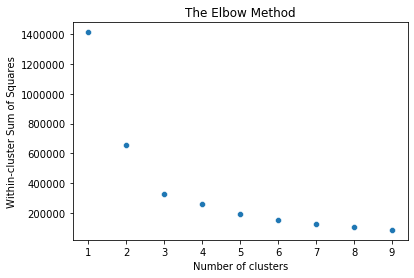

In [54]:
cluster_num = range(1,10)

sns.scatterplot(cluster_num, wcss)

plt.title('The Elbow Method')

# Name the x-axis
plt.xlabel('Number of clusters')

# Name the y-axis
plt.ylabel('Within-cluster Sum of Squares')

plt.show()

In [55]:
kmeans = KMeans(5)

In [56]:
geo_clusters5 = kmeans.fit_predict(X)
geo_clusters5

array([3, 0, 0, 3, 1, 1, 1, 0, 3, 1, 2, 0, 4, 0, 3, 4, 1, 0, 0, 1, 1, 1,
       4, 1, 0, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 4, 4, 0, 0, 1, 3, 4, 1, 1,
       0, 0, 2, 3, 0, 1, 3, 3, 3, 3, 1, 1, 1, 1, 0, 3, 1, 3, 1, 3, 1, 0,
       1, 1, 0, 1, 4, 3, 1, 1, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3,
       4, 3, 4, 0, 3, 1, 3, 1, 4, 1, 0, 4, 0, 1, 0, 0, 1, 1, 1, 3, 1, 1,
       4, 0, 0, 0, 0, 4, 3, 3, 4, 1, 0, 4, 1, 1, 1, 3, 1, 0, 0, 1, 1, 1,
       4, 3, 1, 1, 1, 0, 0, 3, 4, 1, 1, 1, 4, 1, 4, 4, 0, 1, 3, 0, 0, 4,
       0, 4, 1, 4, 1, 3, 2, 1, 1, 0, 4, 4, 0, 0, 3, 2, 3, 4, 4, 4, 1, 3,
       4, 1, 3, 1, 2, 0, 1, 4, 0, 1, 0, 0, 0, 1, 4, 3, 1, 4, 1, 3, 1, 0,
       0, 3, 1, 1, 3, 1, 1, 1, 0, 3, 0, 1, 3, 1, 1, 4, 0, 0, 4, 2, 3, 1,
       1, 4, 0, 0, 1, 3, 3, 0, 1, 3, 3, 3, 3, 4, 4, 2, 2, 0, 0, 0, 0],
      dtype=int32)

In [58]:
# Add clusters to the df.

df['geo_clusters5'] = geo_clusters5
df.head()

,name,Longitude,Latitude,continent,cont_code,geo_clusters5
0,Aruba,-69.982677,12.520880,North America,4,3
1,Afghanistan,66.004734,33.835231,Asia,2,0
2,Angola,17.537368,-12.293361,Africa,1,0
3,Anguilla,-63.064989,18.223959,North America,4,3
4,Albania,20.049834,41.142450,Europe,3,1


## Plot the data

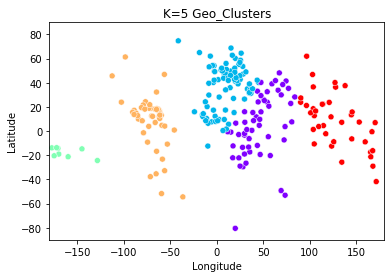

In [64]:
sns.scatterplot(df.Longitude, df.Latitude, c=df.geo_clusters5, cmap='rainbow')

plt.xlim(-180,180)
plt.ylim(-90,90)

plt.title('K=5 Geo_Clusters')
plt.show()